In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("aerofit_treadmill.csv")
display(data)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
#Finding unique products

unique_prods = data['Product'].unique()
unique_prods

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [4]:
#Finding the number of each product in the dataset

x=data['Product'].value_counts()
x

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

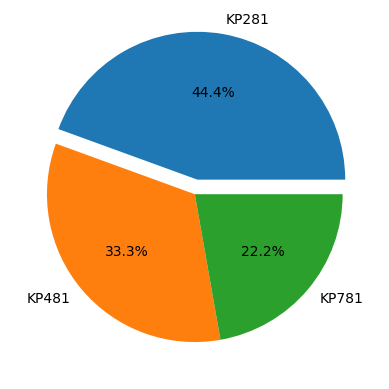

In [5]:
plt.pie(x,labels=unique_prods,autopct='%1.1f%%',explode=(0.1,0,0))
plt.show()

In [6]:
data['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

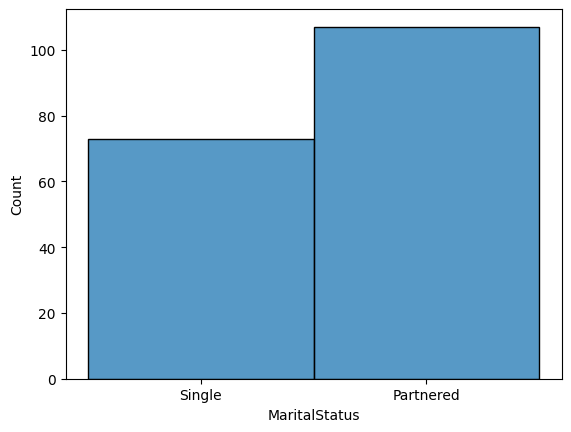

In [39]:
sns.histplot(x=data["MaritalStatus"])
plt.show()

#### This graph shows that people who have a partner tend to use the product more that the single people.

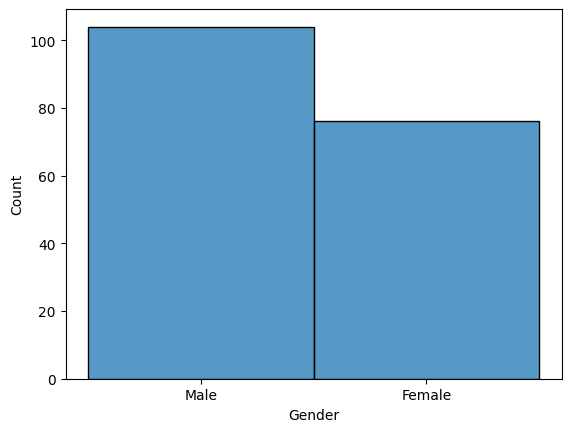

In [50]:
sns.histplot(x=data["Gender"])
plt.show()

#### This plot shows that male population uses the product more than the female population.

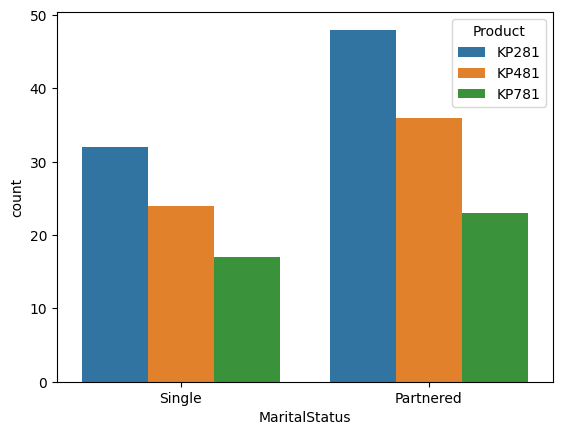

In [9]:
sns.countplot(x=data["MaritalStatus"],hue=data["Product"])
plt.show()
          

#### Irrespective of whether the people have a partner or not, the product KP281 is preferred more.

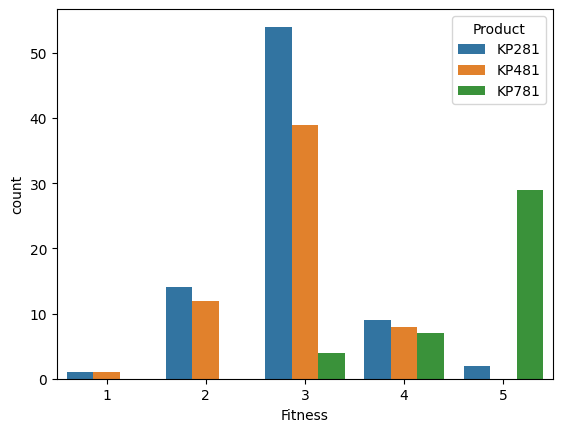

In [37]:
sns.countplot(x=data["Fitness"],hue=data["Product"])
plt.show()

#### People with fitness 3 prefer the products KP281 and KP481 more while the people with fitness 5 prefer KP781 the most.

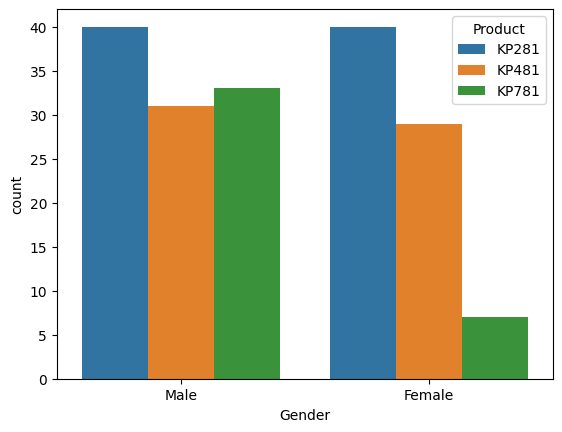

In [38]:
sns.countplot(x=data["Gender"],hue=data["Product"])
plt.show()

#### The female population prefers KP281 and KP481.

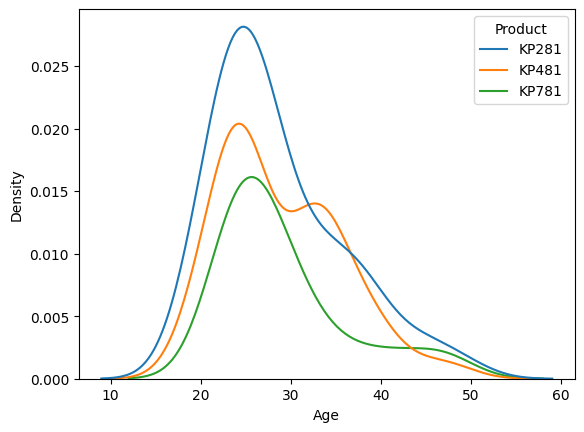

In [10]:
sns.kdeplot(x=data['Age'],hue=data["Product"])
plt.show()

#### People in the age group of around 18-33 use the products more. KP281 is the most preferred product.

In [13]:
print(data['Income'].max())
print(data['Income'].min())

104581
29562


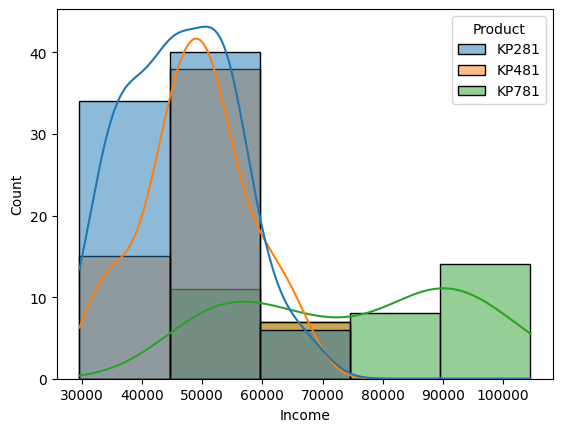

In [35]:
sns.histplot(x=data['Income'],hue=data["Product"],bins=5, kde=True)
plt.show()


#### People with higher income (>80000) use only KP781 while people with income <80000 tend to buy KP281 and KP481. They avoid KP781.

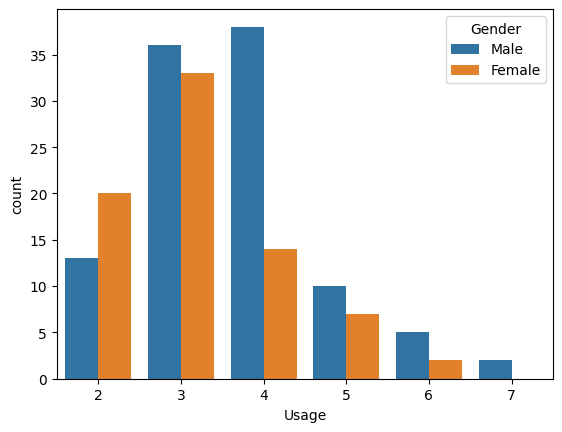

In [54]:
sns.countplot(x=data["Usage"],hue=data["Gender"])
plt.show()

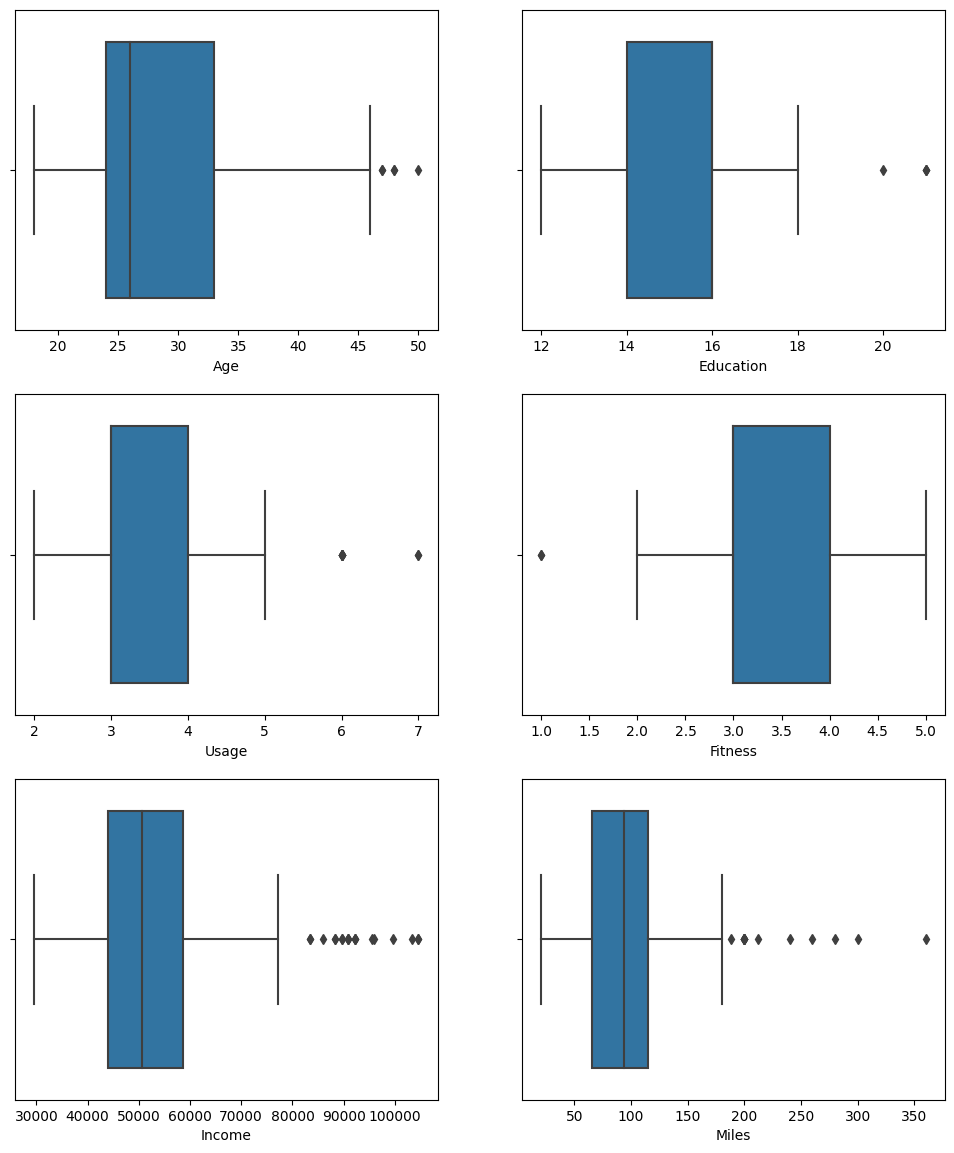

In [60]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=data, x="Miles", orient='h', ax=axis[2,1])
plt.show()

#### Age, Education and Usage have a very few outliers, while Income and Miles have more outliers.

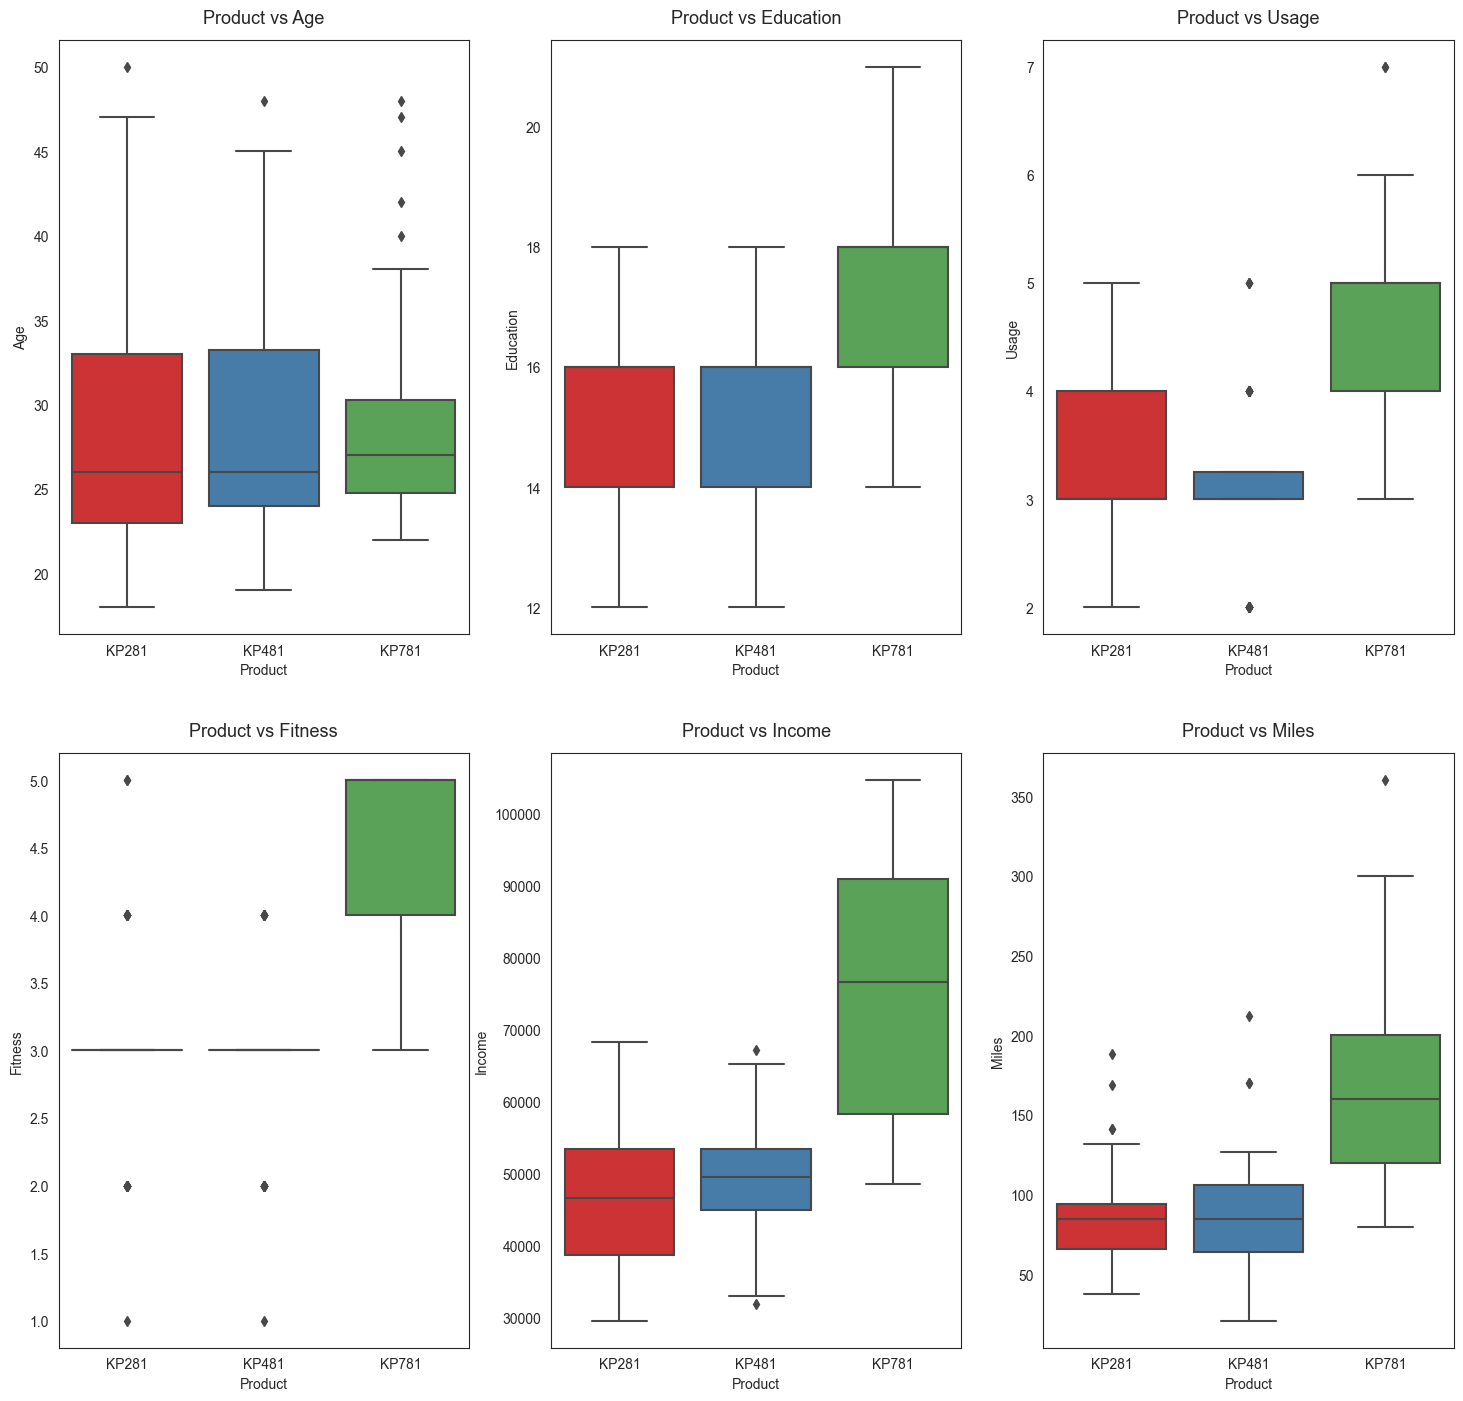

In [64]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=data, x='Product', y=attrs[count], ax=axs[i,j], palette='Set1')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

#### Product vs Age
#### 1. Customers purchasing products KP281 & KP481 are having same Age median value.
#### 2. Customers whose age lies between 25-30, are more likely to buy KP781 product

#### Product vs Education
#### 1. Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
#### 2. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

#### Product vs Usage
#### 1. Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
#### 2. While the other customers are likely to purchasing KP281 or KP481.

#### Product vs Fitness
#### 1. The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

#### Product vs Income
#### 1. Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

#### Product vs Miles
#### 1. If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.


In [5]:
df1 = pd.crosstab(index=data['Gender'], columns=[data['Product']])
df1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [6]:
#Conditional probability

Prob_KP281_m = df1['KP281']['Male']/df1.loc['Male'].sum()
print("P(KP281/male) ", Prob_KP281_m)
Prob_KP481_m = df1['KP481']['Male']/df1.loc['Male'].sum()
print("P(KP481/male) ", Prob_KP481_m)
Prob_KP781_m = df1['KP781']['Male']/df1.loc['Male'].sum()
print("P(KP781/male) ", Prob_KP781_m)
Prob_KP281_f = df1['KP281']['Female']/df1.loc['Female'].sum()
print("P(KP281/Female) ", Prob_KP281_f)
Prob_KP481_f = df1['KP481']['Female']/df1.loc['Female'].sum()
print("P(KP481/Female) ", Prob_KP481_f)
Prob_KP781_f = df1['KP781']['Female']/df1.loc['Female'].sum()
print("P(KP781/Female) ", Prob_KP781_f)

P(KP281/male)  0.38461538461538464
P(KP481/male)  0.2980769230769231
P(KP781/male)  0.3173076923076923
P(KP281/Female)  0.5263157894736842
P(KP481/Female)  0.3815789473684211
P(KP781/Female)  0.09210526315789473


In [7]:
df2 = pd.crosstab(index=data['MaritalStatus'], columns=[data['Product']])
df2

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [8]:
#Conditional probability

p_781_p = df2['KP781']['Partnered'] / df2.loc['Partnered'].sum()
print("P(KP781/Partnered) ",p_781_p)
p_481_p = df2['KP481']['Partnered'] / df2.loc['Partnered'].sum()
print("P(KP481/Partnered) ",p_481_p)
p_281_p = df2['KP281']['Partnered'] / df2.loc['Partnered'].sum()
print("P(KP281/Partnered) ",p_281_p)

p_781_s = df2['KP781']["Single"] / df2.loc["Single"].sum()
print("P(KP781/Single) ",p_781_s)
p_481_s = df2['KP481']["Single"] / df2.loc["Single"].sum()
print("P(KP481/Single) ",p_481_s)
p_281_s = df2['KP281']["Single"] / df2.loc["Single"].sum()
print("P(KP281/Single) ",p_281_s)

P(KP781/Partnered)  0.21495327102803738
P(KP481/Partnered)  0.3364485981308411
P(KP281/Partnered)  0.4485981308411215
P(KP781/Single)  0.2328767123287671
P(KP481/Single)  0.3287671232876712
P(KP281/Single)  0.4383561643835616


## Inference:

### 1. Partnered people use the product more than single people. This maybe because partnered people prefer home workouts more. Hence, this population can be targeted more to increase sale.
### 2. People with higher income use the product KP781 more. This product can be made in reach of people with lesser income by providing any kind of offers.
### 3. Ads can be targeted to the audience in the age group of 18-33 to increase sales.
